# TITANIC DATASET

In [1]:
# The main goal in this project is to analyze the train data and from that predict how many people survived in test data

In [2]:
# Performing Feature Engineering on Titanic dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading the csv files train and test
train_data=pd.read_csv(r'C:\Users\bhavy\OneDrive\Documents\train.csv')
test_data=pd.read_csv(r'C:\Users\bhavy\OneDrive\Documents\test.csv')

In [4]:
# displaying data
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
train_test_data=[train_data,test_data]

# Analyzing given data

In [7]:
# Evaluating train data

train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Evaluating test data

test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
train_data.groupby('Pclass').median()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,472.0,1.0,37.0,0.0,0.0,60.2875
2,435.5,0.0,29.0,0.0,0.0,14.2500
3,432.0,0.0,24.0,0.0,0.0,8.0500


In [10]:
train_data['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

# Visualizing data

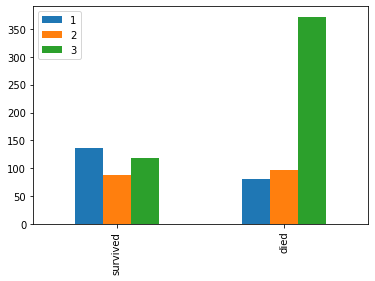

In [11]:
def plot_bar(col):
    survived=train_data[train_data['Survived']==1][col].value_counts()
    died=train_data[train_data['Survived']==0][col].value_counts()
    df=pd.DataFrame([survived,died])
    df.index=['survived','died']
    df.plot(kind='bar')
plot_bar('Pclass')


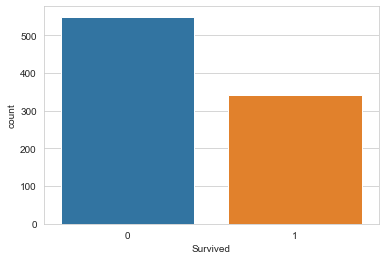

In [12]:
sns.set_style('whitegrid')
grph=sns.countplot(x='Survived',data=train_data)

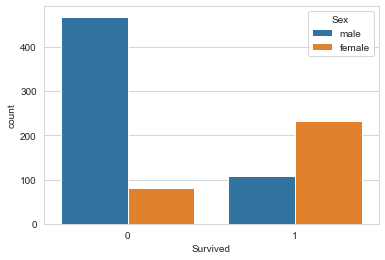

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train_data)

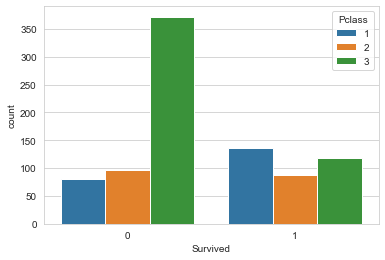

In [14]:
sns.countplot(x='Survived',hue='Pclass',data=train_data)

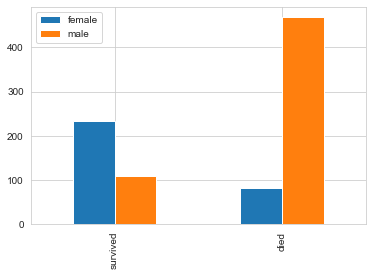

In [15]:
plot_bar('Sex')

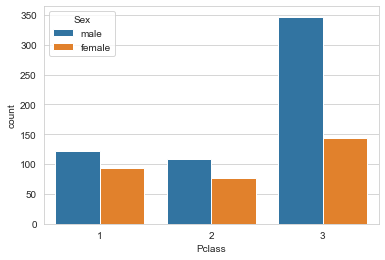

In [16]:
sns.countplot(x='Pclass',hue='Sex',data=train_data)

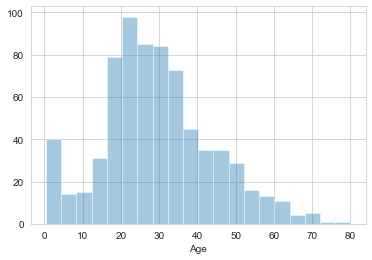

In [17]:
sns.distplot(train_data['Age'],kde=False)

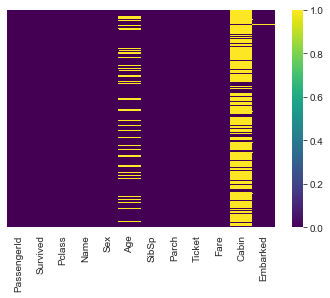

In [18]:
# ANALYZING NULL VALUES IN DATA
sns.heatmap(train_data.isnull(),yticklabels=False,cmap='viridis')

# Cleaning data

In [19]:
"""
lst=[]
for i in range(train_data.shape[0]):
    lst.append(train_data['Name'].loc[i].split(',')[1].split('.')[0][1:])
train_data['Title']=lst
lst=[]
for i in range(test_data.shape[0]):
    lst.append(test_data['Name'].loc[i].split(',')[1].split('.')[0][1:])
test_data['Title']=lst
"""

"\nlst=[]\nfor i in range(train_data.shape[0]):\n    lst.append(train_data['Name'].loc[i].split(',')[1].split('.')[0][1:])\ntrain_data['Title']=lst\nlst=[]\nfor i in range(test_data.shape[0]):\n    lst.append(test_data['Name'].loc[i].split(',')[1].split('.')[0][1:])\ntest_data['Title']=lst\n"

In [20]:
# in this we are traversing both train and test data

# we create a new column in both dataframes and add the designation
train_test_data=[train_data,test_data]
for data in  train_test_data:
    data['Title']=data['Name'].str.extract(' ([A-Za-z]+)\.', expand=True)

# in this we are using regex
#  all the data between space and . is taken

In [21]:
# changing the titles to integer values

# 0 - Mr
# 1 - miss
# 2 - mrs
# 3 - others

title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

for i in train_test_data:
    i['Title']=i['Title'].map(title_mapping)

In [22]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,3
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [23]:
# FILLING THE NULL VALUES OF AGE IN BOTH TRAIN AND TEST DATA USING TITLES COLUMN
train_data['Age'].fillna(train_data.groupby('Title')['Age'].transform('median'),inplace=True)
test_data['Age'].fillna(test_data.groupby('Title')['Age'].transform('median'),inplace=True)

In [24]:
print(train_data['Age'].isnull().sum())
print(test_data['Age'].isnull().sum())

0
0


In [25]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

In [26]:
# SUBSTITUTING THE NULL VALUES OF EMBARKED WITH S AS IT IS MOST COMMON
train_data['Embarked'].fillna('S',inplace=True)

In [27]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [28]:
# NOW REPLACING NULL VALUES OF FARE USING PCLASS COLUMN
for data in train_test_data:
    data['Fare'].fillna(data.groupby('Pclass')['Fare'].transform('median'),inplace=True)

In [29]:
# CREATING A NEW COLUMN FAMILY  WHICH REPRESENTS TOTAL FAMILY NUMBER
for data in train_test_data:
    data['Family']=data['SibSp']+data['Parch']+1

In [30]:
# COMPRESSING THE VALUES OF CABIN
for data in train_test_data:
    data['Cabin']=data['Cabin'].str[0]

In [31]:
train_data['Cabin'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [32]:
train_data['Cabin']

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin, Length: 891, dtype: object

In [33]:
p1=train_data[train_data['Pclass']==1]['Cabin'].value_counts()
p2=train_data[train_data['Pclass']==2]['Cabin'].value_counts()
p3=train_data[train_data['Pclass']==3]['Cabin'].value_counts()

In [34]:
def fill_cabin(dataset):
    df=dataset['Cabin'].isnull()
    for i in range(df.shape[0]):
        if df.loc[i]:
            if dataset['Pclass'].loc[i]==1:
                dataset['Cabin'].loc[i]='C'
            elif dataset['Pclass'].loc[i]==2:
                dataset['Cabin'].loc[i]='F'
            else :
                dataset['Cabin'].loc[i]='G'
fill_cabin(train_data)
fill_cabin(test_data)

C:\Users\bhavy\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [35]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
Family         0
dtype: int64

In [36]:

target=train_data['Survived']
train_data=train_data.drop('Survived',axis=1)
train_data.head()                  

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G,S,0,2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,2,2
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G,S,1,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,2,2
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G,S,0,1


In [37]:
# COMPRESSING VALUES OF CABIN
# G - 0
# F - 1
# others - 2

cabin_dict={'G':0,'F':1,'C':2,'B':2,'D':2,'E':2,'A':2,'T':2}
train_data['Cabin']=train_data['Cabin'].map(cabin_dict)
test_data['Cabin']=test_data['Cabin'].map(cabin_dict)

In [38]:
# COMPRESSING VALUES OF EMBARKED
# S - 0
# C - 1
# Q - 2

train_data['Embarked'].value_counts()
embarked_dict={'S':0,'C':1,'Q':2}
train_data['Embarked']=train_data['Embarked'].map(embarked_dict)
test_data['Embarked']=test_data['Embarked'].map(embarked_dict)

In [39]:
# CONVERTING VALUES OF SEX COLUMN TO INTEGERS FOR ANALYSIS
sex_dict={'male':0,'female':1}
train_data['Sex']=train_data['Sex'].map(sex_dict)
test_data['Sex']=test_data['Sex'].map(sex_dict)

In [40]:
# COMPRESSING VALUES OF FAMILY COLUMN
family_dict = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
train_data['Family']=train_data['Family'].map(family_dict)
test_data['Family']=test_data['Family'].map(family_dict)

In [41]:
# COMPRESSING VALUES OF AGE COLUMN
train_test_data=[train_data,test_data]
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [42]:
train_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family
0,1,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,0,0,0,0.4
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,2,1,2,0.4
2,3,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,0,0,1,0.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,2,0,2,0.4
4,5,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,0,0,0,0.0


In [43]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family
0,892,3,"Kelly, Mr. James",0,2.0,0,0,330911,7.8292,0,2,0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,3.0,1,0,363272,7.0000,0,0,2,0.4
2,894,2,"Myles, Mr. Thomas Francis",0,3.0,0,0,240276,9.6875,1,2,0,0.0
3,895,3,"Wirz, Mr. Albert",0,2.0,0,0,315154,8.6625,0,0,0,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1.0,1,1,3101298,12.2875,0,0,2,0.8


In [44]:
# DELETING EXTRA COLUMNS
del_features=['Name','Ticket','SibSp','Parch']

train_data=train_data.drop(del_features,axis=1)
test_data=test_data.drop(del_features,axis=1)

In [51]:
train_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family
0,1,3,0,1.0,7.2500,0,0,0,0.4
1,2,1,1,3.0,71.2833,2,1,2,0.4
2,3,3,1,1.0,7.9250,0,0,1,0.0
3,4,1,1,2.0,53.1000,2,0,2,0.4
4,5,3,0,2.0,8.0500,0,0,0,0.0


# PREDICTING SURVIVORS 

In [46]:
# CREATING AN SVM MODEL
from sklearn import svm
cl=svm.SVC(kernel='linear',C=10)
cl.fit(train_data,target)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [62]:
# CHECKING THE SCORE
cl.score(train_data,target)

0.8282828282828283

In [61]:
# PREDICTING THE SURVIVORS COLUMN FOR TEST DATA
pred=cl.predict(test_data)
pred.shape

(418,)

In [63]:
# PREDICTED DATA
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [52]:
# PREDICTING VIA DECISION TREES
from sklearn.tree import DecisionTreeClassifier

In [56]:
clf=DecisionTreeClassifier(min_samples_split=1.0,,max_depth=5)
clf.fit(train_data,target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [57]:
# SCORE OF DECISION TREE MODEL
clf.score(train_data,target)

0.8630751964085297

In [66]:
# PREDICTING DATA
decision_tree_pred=clf.predict(test_data)
decision_tree_predsion_tree_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [72]:
from sklearn.ensemble import AdaBoostClassifier
clf2=AdaBoostClassifier(n_estimators=100,random_state=0)

In [74]:
clf2.fit(train_data,target)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)

In [77]:
clf2.score(train_data,target)

0.8451178451178452

In [80]:
from sklearn.ensemble import RandomForestClassifier
clf3= RandomForestClassifier(max_depth='none')

In [82]:
!pip install xgboost
import xgboost as xgb

In [83]:
x_c=xgb.XGBClassifier()
x_c.fit(train_data,target)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [84]:
x_c.score(train_data,target)

0.9943883277216611